In [159]:
# Data Preprocessing in Machine Learning

In [160]:
import pandas as pd
import numpy as np

In [161]:
# creating dataset 

data={
    'name':['Tom', 'Jerry', 'Mickey', 'Donald', 'Popeye'],
    'age':[28, 34, np.nan, np.nan, 35],
    'iq':[np.nan, 100, 110, np.nan, np.nan],
    'married':[np.nan, 0, np.nan, 1, 0],
}

df=pd.DataFrame(data)
print(df)

     name   age     iq  married
0     Tom  28.0    NaN      NaN
1   Jerry  34.0  100.0      0.0
2  Mickey   NaN  110.0      NaN
3  Donald   NaN    NaN      1.0
4  Popeye  35.0    NaN      0.0


**There are some missing values which should be handled, In python scikit-learn library performs Imputation.**  

**Imputation is basically handling missing values.**  
**Missing values can be updated by caluclating mean, median or mode of the given columns**

*A LIBRARY is a collection of modules,usually containing co-related functionality.*  
*A MODULE is a single python file containing python code*

In [162]:
import missingno as mso

<Axes: >

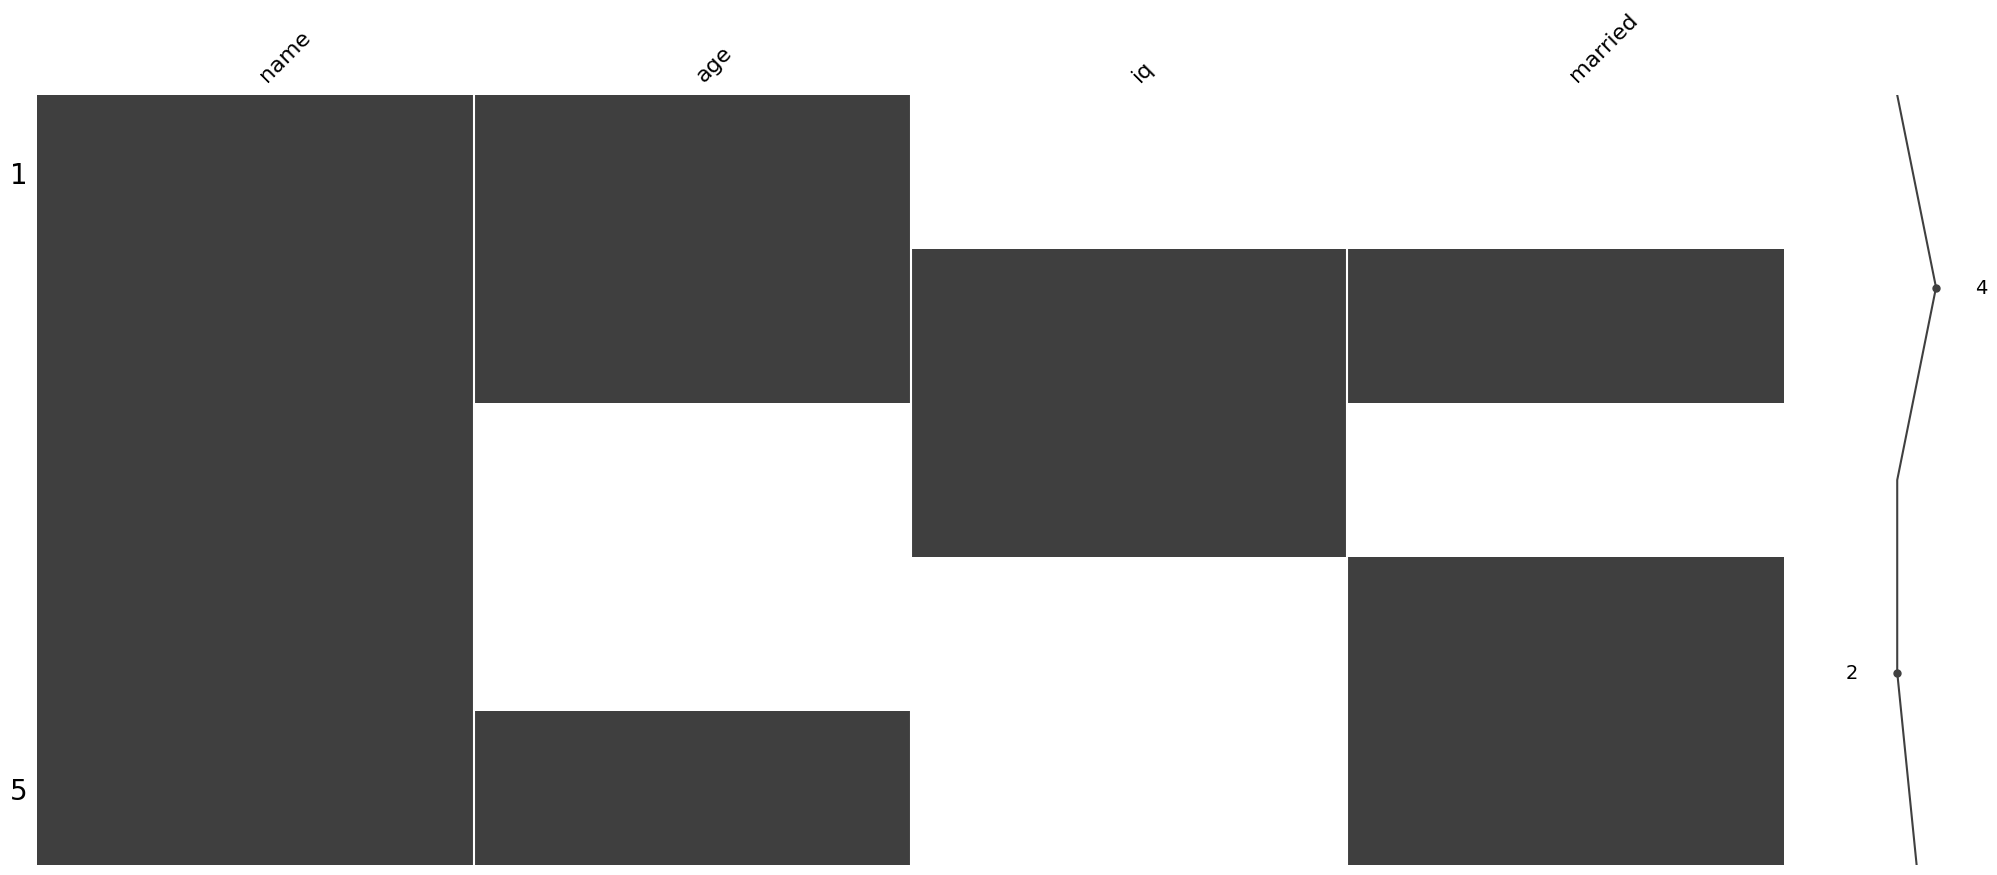

In [163]:
mso.matrix(df)

In [164]:
from sklearn.impute import SimpleImputer

In [165]:
# to get information about class
SimpleImputer?

Init signature:
SimpleImputer(
    *,
    missing_values=nan,
    strategy='mean',
    fill_value=None,
    copy=True,
    add_indicator=False,
    keep_empty_features=False,
)
Docstring:     
Univariate imputer for completing missing values with simple strategies.

Replace missing values using a descriptive statistic (e.g. mean, median, or
most frequent) along each column, or using a constant value.

Read more in the :ref:`User Guide <impute>`.

.. versionadded:: 0.20
   `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
   estimator which is now removed.

Parameters
----------
missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
    The placeholder for the missing values. All occurrences of
    `missing_values` will be imputed. For pandas' dataframes with
    nullable integer dtypes with missing values, `missing_values`
    can be set to either `np.nan` or `pd.NA`.

strategy : str, default='mean'
    The imputation strategy.

    - If "mean",

In [166]:
# Creating object of SimpleImputer class
# BY-DEFAULT - strategy='mean'
si=SimpleImputer(strategy='mean')

In [167]:
# fit in SimpleImputer means it will learn the parameters from the data and transform will apply the learning.
# so fit_transform will do both the things.
# first it will learn the parameters and then it will apply the learning on the data.
# learning the parameters means it will learn the mean, median, mode, etc, of the data.
si.fit(df[['age']])

SimpleImputer()

In [168]:
df

,name,age,iq,married
0,Tom,28.0,NaN,NaN
1,Jerry,34.0,100.0,0.0
2,Mickey,NaN,110.0,NaN
3,Donald,NaN,NaN,1.0
4,Popeye,35.0,NaN,0.0


In [169]:
# df[['age','iq']]=si.fit(df[['age','iq']])

In [170]:
# df

In [171]:
df[['age']]=si.fit_transform(df[['age']])


In [172]:
df

,name,age,iq,married
0,Tom,28.000000,NaN,NaN
1,Jerry,34.000000,100.0,0.0
2,Mickey,32.333333,110.0,NaN
3,Donald,32.333333,NaN,1.0
4,Popeye,35.000000,NaN,0.0


In [173]:
si2=SimpleImputer(strategy='most_frequent')

In [174]:
# fit_transform requires 2D array or dataframe
# first fit then transform 2d-array or dataframe and then returned the transformed data.
si2.fit_transform(df[['married']])

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [175]:
df[['married']]=si2.fit_transform(df[['married']])

In [176]:
df

,name,age,iq,married
0,Tom,28.000000,NaN,0.0
1,Jerry,34.000000,100.0,0.0
2,Mickey,32.333333,110.0,0.0
3,Donald,32.333333,NaN,1.0
4,Popeye,35.000000,NaN,0.0


In [177]:
si3=SimpleImputer(strategy='constant',fill_value=100000)

In [178]:
si3.fit_transform(df[['iq']])

array([[100000.],
       [   100.],
       [   110.],
       [100000.],
       [100000.]])

In [179]:
df[['iq']]=si3.fit_transform(df[['iq']])

In [180]:
df

,name,age,iq,married
0,Tom,28.000000,100000.0,0.0
1,Jerry,34.000000,100.0,0.0
2,Mickey,32.333333,110.0,0.0
3,Donald,32.333333,100000.0,1.0
4,Popeye,35.000000,100000.0,0.0


<Axes: >

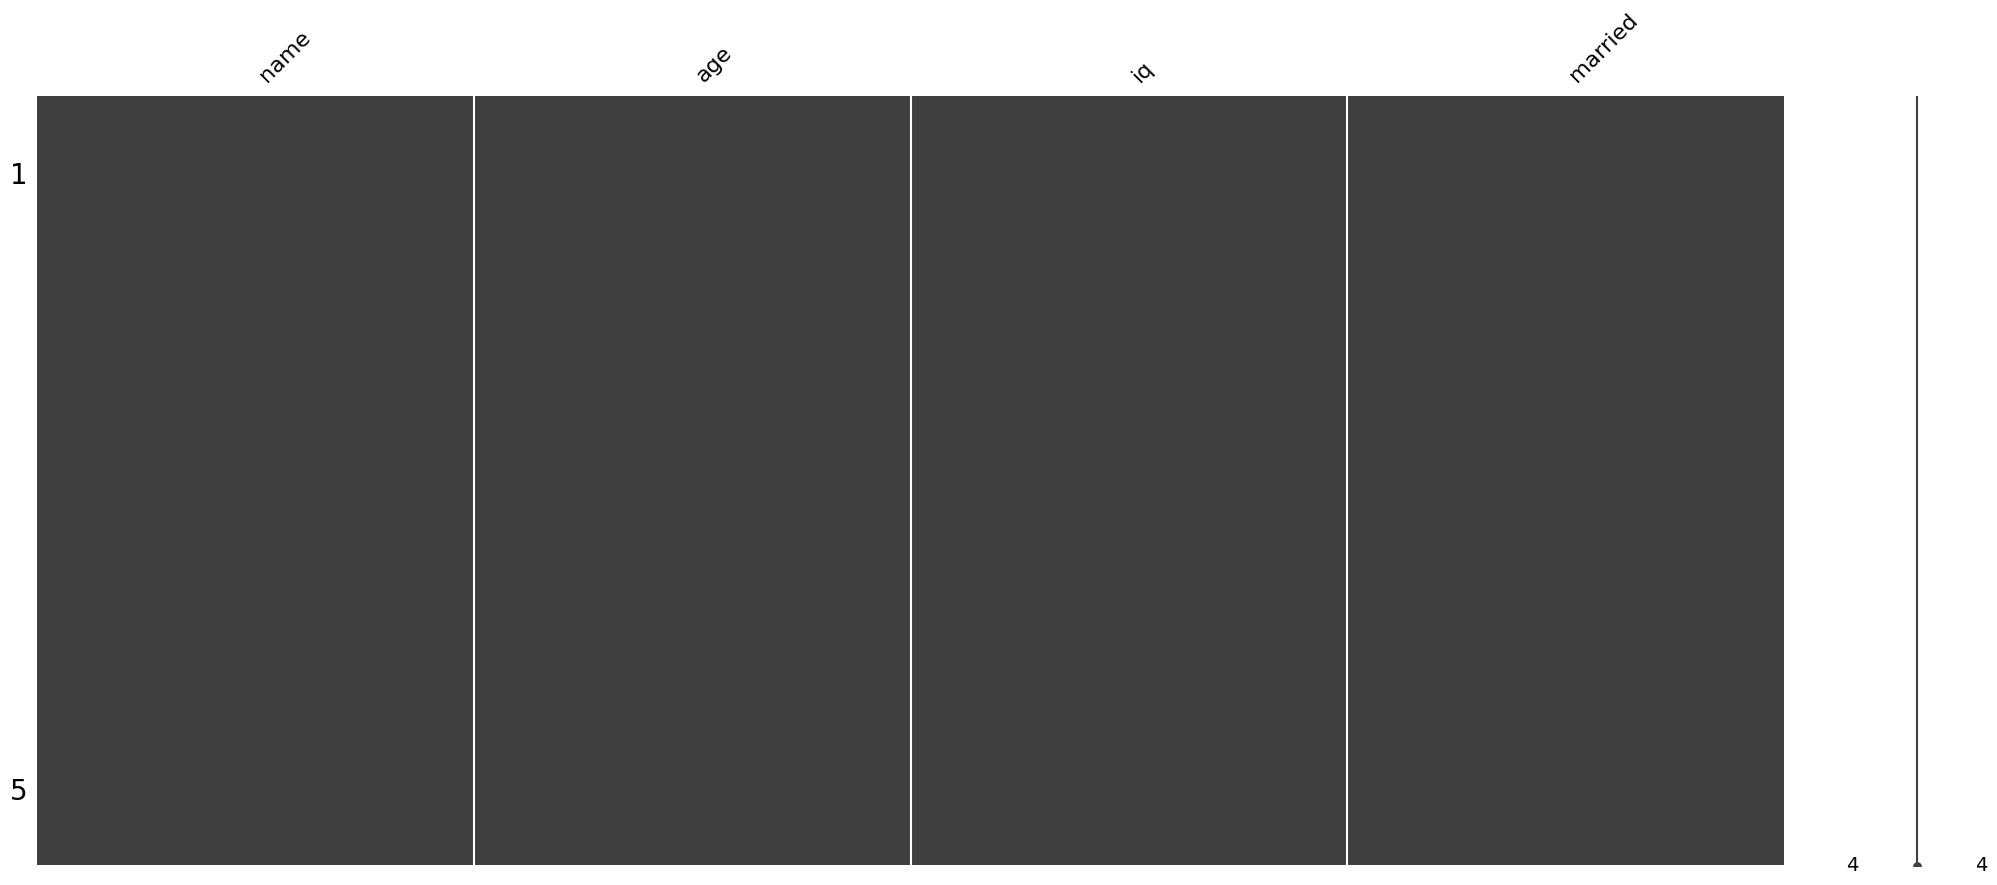

In [181]:
mso.matrix(df)